수치 미분으로 들어가자..

## 미분에 대한 정의
>- 어떤 함수의 정의역 속 각 점에서, 독립 변수의 값의 변화량과 함수값의 변화량 비율의 극한 혹은 극한의 집합
>- 치역으로 가지는 새로운 함수

>- 이런 새로운 함수를 구할 수 있는데 이를 미분/ derivate라고 한다.
>- 이런 미분 함수 (도함수)를 구하는 작업을 미분법/ differentiation이라고 한다.

- 미분은 함수에 있어서 *특정 순간의 변화량*을 의미한다.
    - x값 에서의 작은 변화가 함수 f(x)를 얼마나 변화시키는가
    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbPGD3P%2FbtqJbmGjgGL%2FqQpXpV8MKfEj9YY4VKDmMK%2Fimg.png" width="350">
    
### 미분을 구하는 방법
* 1. 중앙 차분 방법
   * 가장 정확한 값 도출
       <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FRXL4u%2FbtqJiiv78ol%2FZFvRX5213WEIadrWIwKPXK%2Fimg.png" width="350">
* 2. 전진 차분 방법
* 3. 후진 차분 방법

## <수치미분 코드를 Python으로 작성>
>- 입력으로 들어오는 x에서 아주 미세하게 값이 변화할 때 함수 f는 얼마나 변하는가 수치적으로 계산해서 return
>- 일변수 함수 -> 입력되는 값이 Scalar
>- 이변수 함수


- Python은 **일급함수**를 지원한다. : 
    - <U>하나의 함수를 다른 함수의 인자로 전달할 수 있다.</U>
    - <U>일반적으로 외부에서 def, lambda를 이용해서 정의한다.</U>
    
- 중앙차분으로 미분을 수행한다.
    - `delta_x`는 0과 가까운 작은 값을 이용하고 1e-8 이하는 사용하면 안된다.
    - 컴퓨터의 반올림 오차 때문에 엉뚱한 값이 나오게 된다.
    - `delta_x`는 1e-4 ~ 1e-6 정도의 수로 설정하면 된다. (1e-4)
    - `delta_x = 1e-4`  # 0.0001
    
    
## 일변수 함수의 수치미분 코드

In [13]:
# 일변수 함수의 수치미분 코드를 Python으로 작성
# 입력으로 들어오는 x에서 아주 미세하게 값이 변화할 때 함수 f는 얼마나 변하는가 수치적으로 계산해서 return

# 일변수 함수 -> 입력되는 값이 Scalar

# f(x) = x^2
# f'(5) = ?

def numerical_derivative(f, x):
    # f : 미분하려는 함수가 들어온다.
    # Python은 일급함수를 지원한다. : 
    # - 하나의 함수를 다른 함수의 인자로 전달할 수 있다.
    # - 일반적으로 외부에서 def, lambda를 이용해서 정의한다.
    
    # 중앙차분으로 미분을 수행한다.
    # - delta_x는 0과 가까운 작은 값을 이용하고 1e-8 이하는 사용하면 안된다.
    # - 컴퓨터의 반올림 오차 때문에 엉뚱한 값이 나오게 된다.
    # - delta_x는 1e-4 ~ 1e-6 정도의 수로 설정하면 된다. (1e-4)
    delta_x = 1e-4  # 0.0001
    
    return (f(x + delta_x) - f(x - delta_x)) / (2 * delta_x) 

# 미분하려는 함수를 만든다.
# f(x) = x^2
def my_func(x):
    return x**2

# 함수 f(x) = x**2에서 미분계수 f'(5)를 구한다.
result = numerical_derivative(my_func, 5)
print('일변수 함수 미분')
print('f(x) = x^2, f\'(5) = ?')
print('result : {}'.format(result))  # 약 10

일변수 함수 미분
f(x) = x^2, f'(5) = ?
result : 9.999999999976694


##  다변수 함수에 대한 수치미분 코드
- 실제로 머신러닝, 딥러닝에 사용할 미분코드 작성

- 다변수 함수인 경우 입력변수가 하나 이상이므로,
- 이 입력변수들은 서로 독립이기 때문에 수치미분할 때 개별적으로 계산해줘야 한다.

>- f(x, y) = 2x + 3xy + y^3
>- f'(1.0, 5.0) = (8, 15)

In [14]:
# 실제로 머신러닝, 딥러닝에 사용할 미분코드 작성
# 다변수 함수에 대한 미분
# 다변수 함수인 경우 입력변수가 하나 이상이므로,
# 이 입력변수들은 서로 독립이기 때문에 수치미분할 때 개별적으로 계산해줘야 한다.

# f(x, y) = 2x + 3xy + y^3
# f'(1.0, 2.0) = (8, 15)

# 수치미분 최종 코드
import numpy as np

def numerical_derivative(f, x):
    # f: 미분하려고 하는 다변수 함수
    # x : 모든 변수를 포함하고 있어야 한다. ndarray (차원 상관 없이)
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # 미분한 결과를 저장하는 ndarray
    
    # iterator를 이용해서 입력변수 x에 대해 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index # iterator의 현재 index를 추출
        # 현재 칸의 값을 어딘가에 잠시 저장한다.
        
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x) # f(x + delta_x)
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x) # f(x - delta_x)
    
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp # 데이터 원상 복구
        
        it.iternext()
    
    return  derivative_x

    
# 이렇게 구현된 수치미분 함수를 이용하여 일변수 함수 미분하기
def my_func(x):
    return x**2

## f(x) = x^2에서 f'(3) ??
result = numerical_derivative(my_func, np.array([3.0]))
print('일변수 함수 미분')
print('f(x) = x^2, f\'(5) = ?')
print('result: {}'.format(result))

print("=================================================")

# f(x, y) = 2x + 3xy + np.power(y, 3)
# 이렇게 구현된 수치미분 함수를 이용하여 이변수 함수 미분하기
def my_func(input_data):
    x = input_data[0]
    y = input_data[1]
    return 2*x + 3*x*y + np.power(y, 3)

result = numerical_derivative(my_func, np.array([1.0, 2.0]))
print('이변수 함수 미분')
print('f(x, y) = 2x + 3xy + np.power(y, 3), f\'(1, 2)) = ?')
print('result: {}'.format(result))

일변수 함수 미분
f(x) = x^2, f'(5) = ?
result: [6.]
이변수 함수 미분
f(x, y) = 2x + 3xy + np.power(y, 3), f'(1, 2)) = ?
result: [ 8.         15.00000001]


In [15]:
# iterator가 가르키는 값에 대하여 
arr = np.array([[1, 2, 3], 
                [4, 5, 6]])
it = np.nditer(arr, flags=['multi_index']) # 다차원에서 사용됨

while not it.finished:    #iterator가 지정하는 위치가 끝이 아닐 동안 반복
    idx = it.multi_index         # iterator가 현재 가리키는 곳의 index 숫자를 가르킨다.
    print(arr[idx], end=' ')
    print(idx)
    it.iternext()          # iterator를 다음 요소로 이동시키는 작업
# 1 (0, 0)
# 2 (0, 1)
# 3 (0, 2)
# 4 (1, 0)
# 5 (1, 1)
# 6 (1, 2)

1 (0, 0)
2 (0, 1)
3 (0, 2)
4 (1, 0)
5 (1, 1)
6 (1, 2)


# <Machine Learning에서의 Regression>

- 지도 학습이란, 학습된 결과를 바탕으로 미래의 무엇을 예측하느냐에 따라 크게 2가지로 구분된다. 
-1) Regression 
    - 1-1) **Linear Regression**
     - Training Data Set를 이용해서 학습된 결과를 만들고 연속적인 숫자값을 예측하는 것
    - 1-2) Logistic Regression
-2) Classification
    - 2-1) binary classification
    - 2-2) multinomial classification
    
### 문제를 단순화시켜서 다음의 데이터를 이용해 보자
>- 공부시간 (x), 시험시간 (t)를 이용해서 데이터를 표현해 보자.
>- 이 데이터를 2차원 평면에 scatter (산점도)를 이용해서 표현해보자.



,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


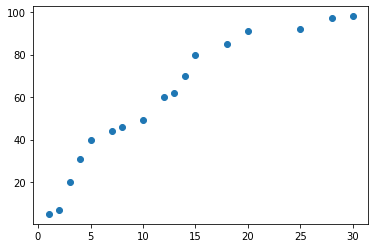

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = { '공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
         '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]}

df = pd.DataFrame(data)

display(df.head())

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])  # 산점도를 구할 수 있어요!
plt.show()

이 데이터를 가장 잘 표현하는 직선을 그린다.
> y = ax + b (a는 기울기 (slop), b는 절편)

- 초기의 기울기 a와 절편 b는 랜덤하게 결정되고, 그 이후 우리가 가지는 데이터 특성을 가장 잘 표현하기 위한 직선을 찾아가는 과정이 진행되게 된다.
- 그 과정을 **학습 (learning)**이라고 한다.
- 결국은 데이터를 가장 잘 표현하는 직선 (y)를 만들 수 있고,
- 이 직선을 **predictive model**이라고 한다. => **linear regression**


>- y = ax + b  => 수학에서는 이렇게 표현한다. (a는 기울기 (slop), b는 절편)
>- y = Wx + b **(W: weight, 가중치, b : bias, 바이어스)**

- W, b는 어떻게 결정되는가?

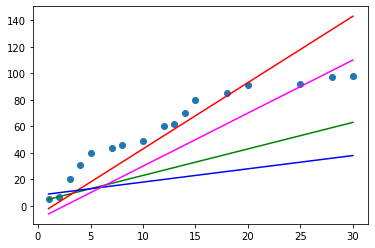

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = { '공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
         '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]}

df = pd.DataFrame(data)

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])  # 산점도를 구할 수 있어요!
# 직선을 표현하는게...y = ax + b
plt.plot(df['공부시간(x)'],df['공부시간(x)']*2 + 3, color='g')
plt.plot(df['공부시간(x)'],df['공부시간(x)']*5 - 7, color='r')
plt.plot(df['공부시간(x)'],df['공부시간(x)']*1 + 8, color='b')
plt.plot(df['공부시간(x)'],df['공부시간(x)']*4 - 10, color='magenta')
plt.show()

## 오차와 손실함수

### 오차와 최소제곱법

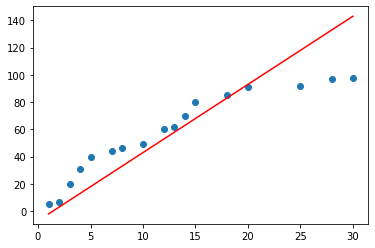

In [28]:
# 오차
# 오차를 이해하기 위해 선 1개만 가지고 생각해 보자
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = { '공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
         '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]}

df = pd.DataFrame(data)

plt.scatter(df['공부시간(x)'],df['시험점수(t)'])  # 산점도를 구할 수 있어요!
plt.plot(df['공부시간(x)'],df['공부시간(x)']*5 - 7, color='r')
plt.show()

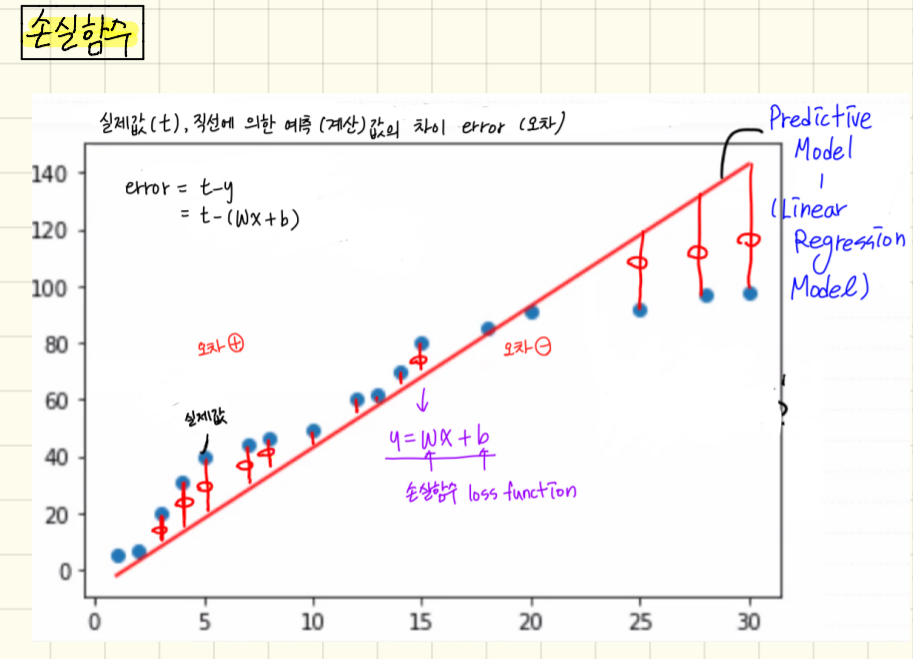
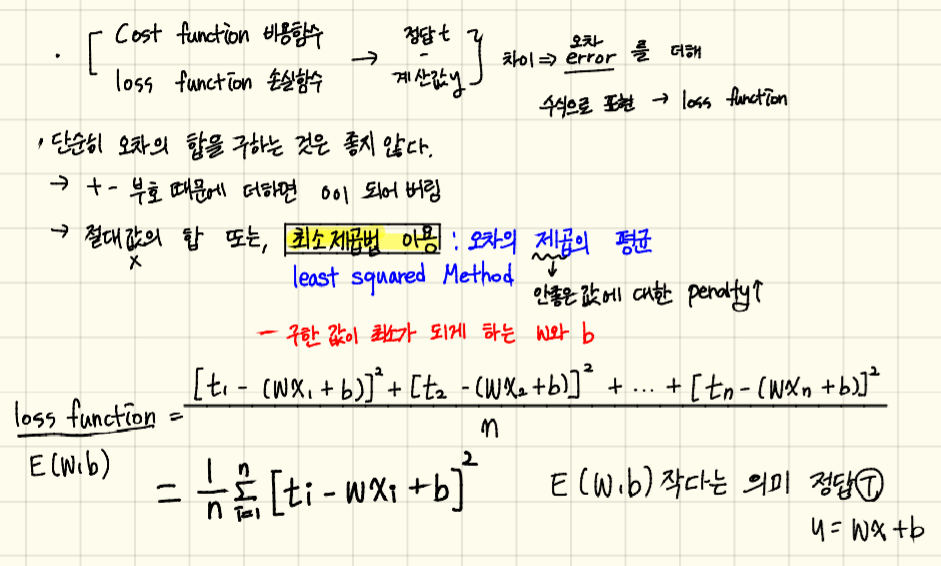
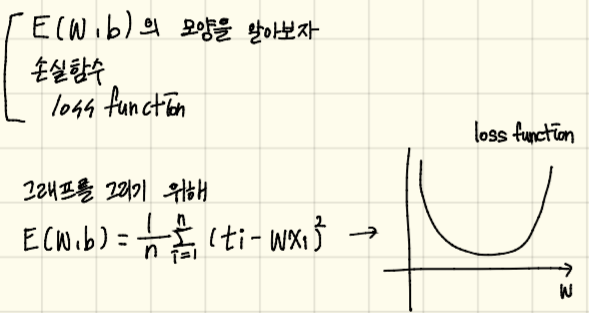

### loss function

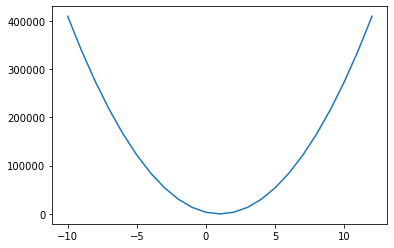

In [29]:
# loss function의 모양을 확인하기 위해 graph를 그린다.

import numpy as np
import matplotlib.pyplot as plt

# training data set
x = np.arange(1,101)
t = np.arange(1,101)

# W
W = np.arange(-10,13)

loss = []

for tmp in W:
    loss.append(np.power((t-tmp*x),2).mean())

plt.plot(W,loss)
plt.show()